## Python and R

This setup allows you to use *Python* and *R* in the same notebook.

To set up a similar notebook, see quickstart instructions here:

https://github.com/dmil/jupyter-quickstart

Some thoughts on why I like this setup and how I use it at the [end](notebook.ipynb#Thoughts) of  this notebook.

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

This is a Python notebook, but below is an R cell. The `%%R` at the top of the cell indicates that the code in this cell will be R code.

In [2]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


## Read Data

In [3]:
df = pd.read_csv('election_results.csv')
df

,fips,state,county,year,type,class,democratic,republican,other,total,democratic_pct,republican_pct,other_pct
0,1001,Alabama,Autauga County,2024,presidential,NaN,7439,20484,358,28281,26.303879,72.430254,1.265868
1,1003,Alabama,Baldwin County,2024,presidential,NaN,24934,95798,1517,122249,20.396077,78.363013,1.240910
2,1005,Alabama,Barbour County,2024,presidential,NaN,4158,5606,91,9855,42.191781,56.884830,0.923389
3,1007,Alabama,Bibb County,2024,presidential,NaN,1619,7572,66,9257,17.489467,81.797559,0.712974
4,1009,Alabama,Blount County,2024,presidential,NaN,2576,25354,233,28163,9.146753,90.025921,0.827327
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11447,56037,Wyoming,Sweetwater County,2024,senate,1.0,3550,12724,77,16351,21.711210,77.817870,0.470919
11448,56039,Wyoming,Teton County,2024,senate,1.0,7885,5083,91,13059,60.379815,38.923348,0.696837
11449,56041,Wyoming,Uinta County,2024,senate,1.0,1478,7310,53,8841,16.717566,82.682954,0.599480
11450,56043,Wyoming,Washakie County,2024,senate,1.0,588,3207,26,3821,15.388642,83.930908,0.680450


## Ask a question

You can do this part in Python or in R. If you want to try it in R, don't forget to put `%%R -i df` at the top of the cell to import the `df` variable from Python into R. 

#### 🤔 WHAT IS YOUR QUESTION?

In [4]:
# 👉  Which state had the most independent votes?

Write code below to modify/pivot/etc the dataframe to answer your question. Perform any calculations you need.

In [13]:
independents = df.groupby('state')['other_pct'].sum().sort_values(ascending=False)
print(independents)

state
Nebraska          3615.693248
Texas             1812.462329
Minnesota         1335.178845
Indiana           1155.893324
Missouri          1108.514669
Kansas            1090.035432
Virginia          1070.065339
Illinois          1063.672784
Ohio              1061.105418
Michigan           999.795012
Utah               971.144288
Iowa               951.601511
Alaska             856.853224
Wisconsin          819.186647
California         810.465216
Colorado           797.916097
Montana            793.393721
Kentucky           792.147490
Idaho              779.651881
Tennessee          750.951616
North Dakota       722.363277
Arkansas           720.779259
Georgia            686.743975
Washington         679.678809
West Virginia      673.726921
South Dakota       658.257314
Pennsylvania       654.319504
Oklahoma           618.232189
Oregon             602.210834
New York           598.271024
North Carolina     568.334823
Florida            513.846053
New Mexico         496.374599
Main

## Make some charts that help answer the question
You probably want to do this bit in R. You can find an example chart and map in `02-example.ipynb`

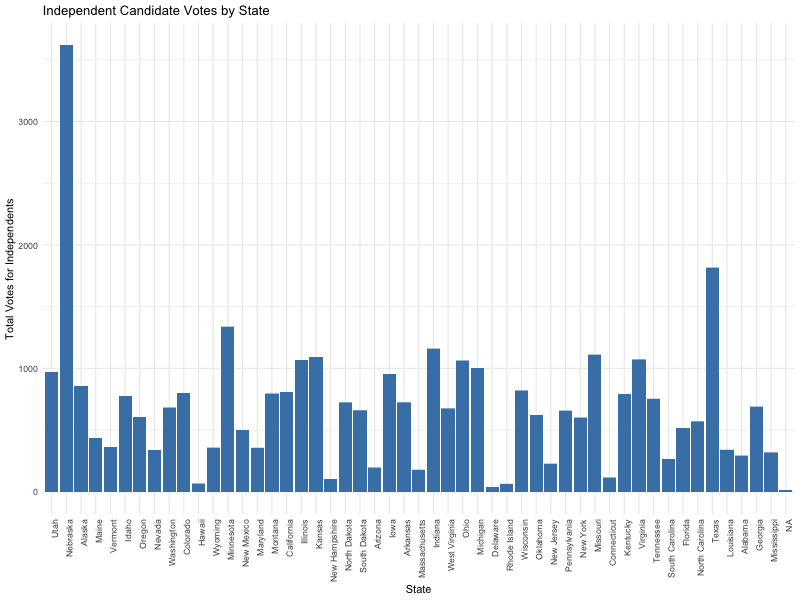

In [17]:
%%R -i df -w 800 -h 600

library(ggplot2)

ggplot(df, aes(x = reorder(state, -other_pct), y = other_pct)) + 
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Independent Candidate Votes by State",
       x = "State",
       y = "Total Votes for Independents") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

In [8]:
%%R 
library(ggplot2)



# Short Memo

Write a short memo about what you found. It doesn't have to be a new discovery. Just do a little bit of googling and explain to me what you found and what further questions you have. Submit the Google Doc and a link to your GitHub repo with the code in courseworks. It doesn't have to be longer than a few lines or bullet points. Please include the relevant chart or graph. Remember, the goal is inquiry, not storytelling (yet). 